In [27]:
import pandas as pd
import numpy as np
from pathlib import Path
import os



In [28]:
Path.cwd()

PosixPath('/tf/animal_clasificacion')

In [29]:

project_folder = "animal_clasificacion" 
if os.getcwd().endswith("/tf"):
    os.chdir(project_folder)

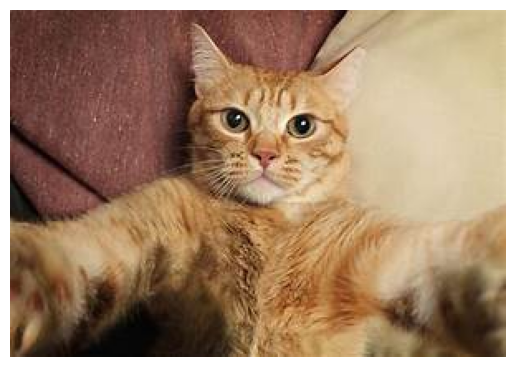

In [30]:
import matplotlib.pyplot as plt
from PIL import Image


# importando la imágen a array

img = Image.open('raw-img/gatto/1.jpeg')


# Representando con matplotlib
def mostrar_imagen(imagen):
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.show()
    

mostrar_imagen(img)

In [31]:
BASE_DIR = Path().cwd()

IMG_DIRECTORY = BASE_DIR / 'raw-img'


animales = dict()

for animal in os.listdir(IMG_DIRECTORY):
    rutas = list((IMG_DIRECTORY / animal).iterdir())
    animales[animal] = rutas
    

In [32]:
animales


{'mucca': [PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-YgUPGYR0bpPTcacgXUxrSgHaFK.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-LO2VoErJp3ns7-v00powbAHaEo.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-7cHoY3UYsCZQKyHzlnFOqgHaFj.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-2S1aXxRySVIbHTSoGbrkIQHaFj.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-1irfBSzjuW_IKzpr03VkegHaFH.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-jokPwBO633xLSvqZ9izkwQHaF0.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-5y9K0LVUK0k79DL29hwEGwHaE9.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-cBDHc-GRjx_iMoAWabBCwwHaGa.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-ka-pR1SdqqTjlaCcQoHlEwHaF7.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-p4ifyEpq_1CNleQ0xQ9oNgHaHa.jpeg'),
  PosixPath('/tf/animal_clasificacion/raw-img/mucca/OIP-GUB23GUeT-tEYornbWg2mQHaF

In [33]:

animales_show = {}

for animal in os.listdir(IMG_DIRECTORY):
    # toma solo la primera imagen encontrada en cada carpeta
    imagenes = list((IMG_DIRECTORY / animal).iterdir())
    if imagenes:
        animales_show[animal] = imagenes[0]

In [34]:
print(animales['gatto'])         # debe mostrar una sola ruta
print(type(animales['gatto']))  # debe ser <class 'pathlib.PosixPath'>


[PosixPath('/tf/animal_clasificacion/raw-img/gatto/1029.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/1637.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/774.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/1727.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/923.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/30.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/166.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/648.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/991.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/644.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/ea37b60a2ef4073ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/1057.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/870.jpeg'), PosixPath('/tf/animal_clasificacion/raw-img/gatto/ea36b20828f6063ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg'), 

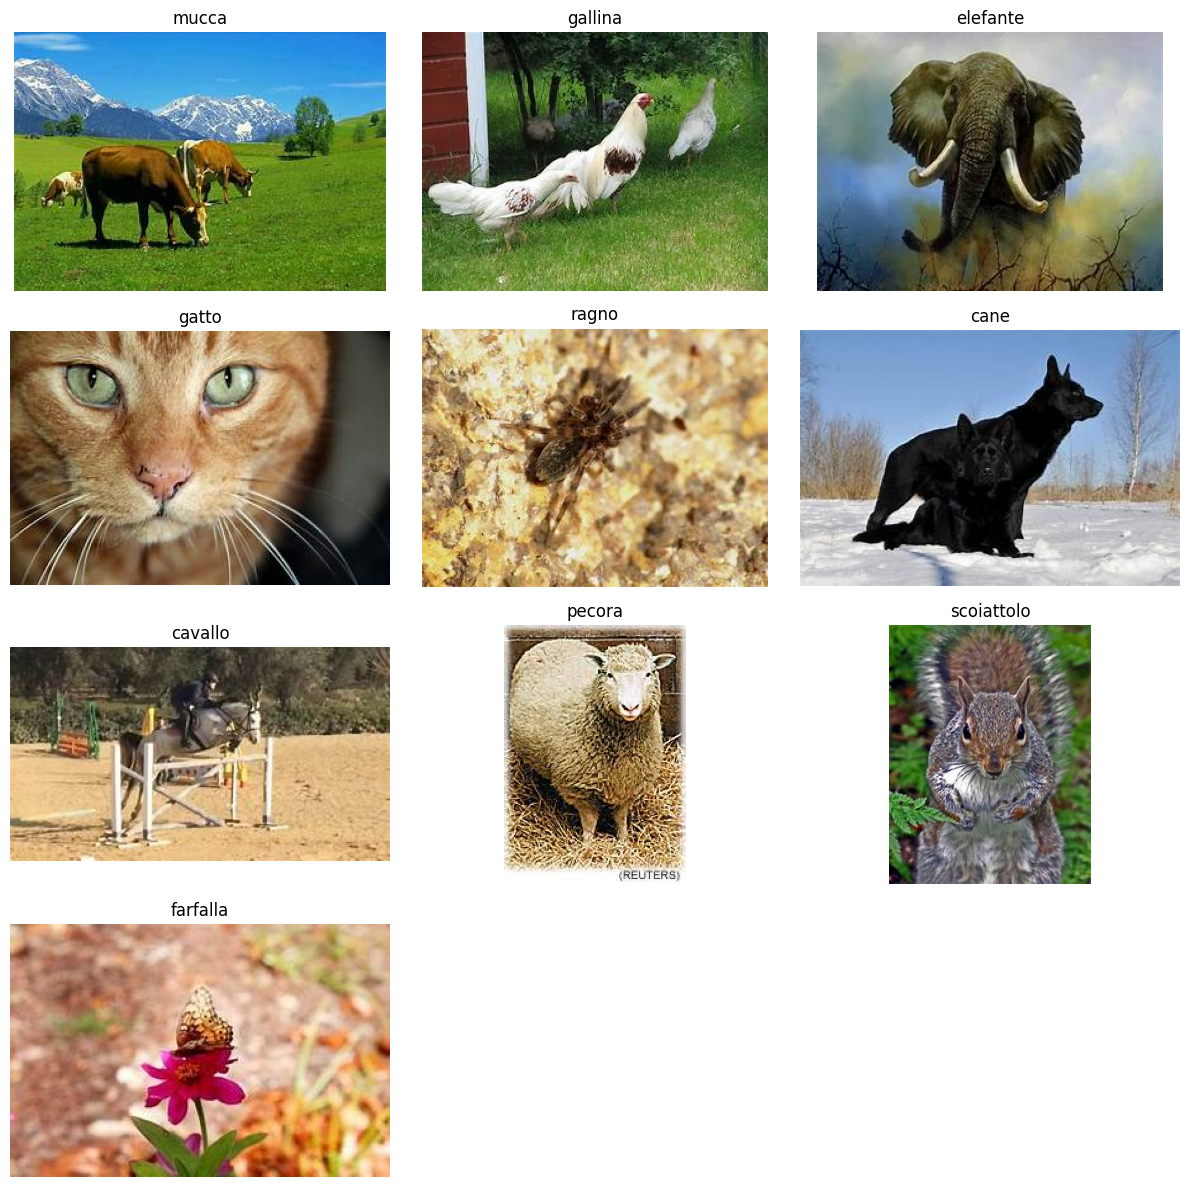

In [35]:
n_animales = len(animales_show)


fig, axes = plt.subplots(4, 3, figsize=(12, 12))  


axes = axes.flatten()

for i, (nombre, ruta) in enumerate(animales_show.items()):
    if i >= 10:
        break  # solo mostramos hasta 9 imágenes
    img = Image.open(ruta)
    
    axes[i].imshow(img)
    axes[i].set_title(nombre, fontsize=12)
    axes[i].axis('off')
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


data_dir = 'raw-img'

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

Found 26179 files belonging to 10 classes.


In [37]:
for img, labels in dataset.take(1):
    print("Shape del batch de imágenes:", img.shape)  # (32, 224, 224, 3)
    print("Shape de las etiquetas:", labels.shape)  

Shape del batch de imágenes: (32, 224, 224, 3)
Shape de las etiquetas: (32,)


['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


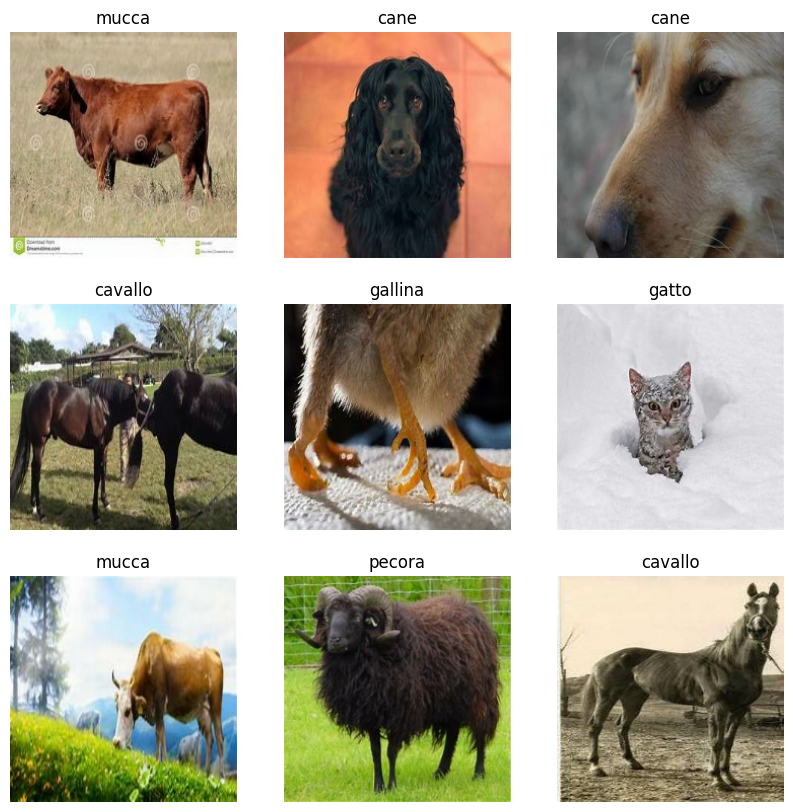

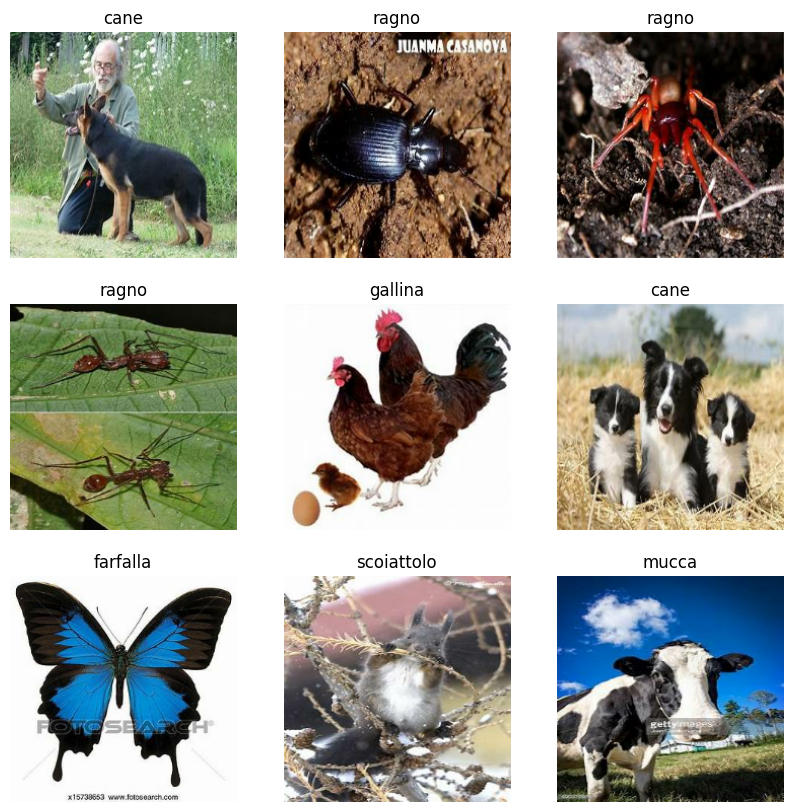

In [38]:


class_names = dataset.class_names

print(class_names)

for img, labels in dataset.take(2):
    
    plt.figure(figsize=(10, 10))
    
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i].numpy()])      # mostrar el nombre de la clase
        plt.axis("off")

In [39]:
from tensorflow.keras.layers import Rescaling


capa_normalizadora = Rescaling(1./255)

# Toma img, label aplicando solo a la imágen la normalizacion y obteniendo la imágen normalizada
normalized_ds = dataset.map(lambda x, y: (capa_normalizadora(x), y))


In [40]:
for imagen, _ in normalized_ds.take(1):
    print("Mínimo:", imagen.numpy().min())
    print("Máximo:", imagen.numpy().max())

Mínimo: 0.0
Máximo: 1.0


# Data Augmentation

In [41]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

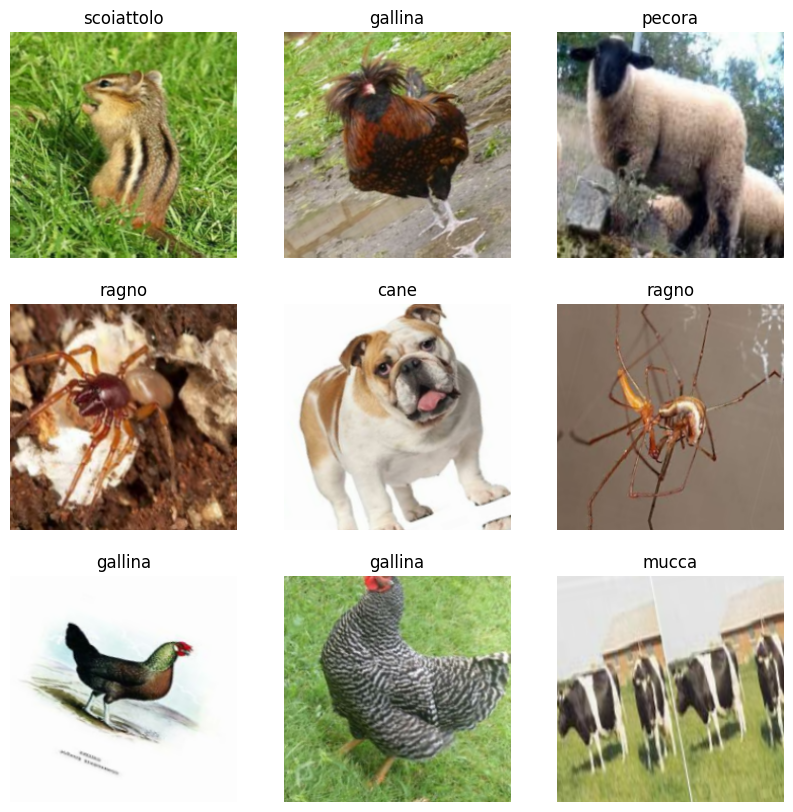

In [42]:
# Mostrar algunas imágenes aumentadas
import matplotlib.pyplot as plt

for images, _ in dataset.take(1):
    augmented_images = data_augmentation(images)
    
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(class_names[_[i].numpy()])
        plt.axis("off")
    break


In [43]:
final_ds = dataset.map(lambda x, y: (capa_normalizadora(data_augmentation(x)), y))


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

data_dir = "raw-img"
batch_size = 32
img_size = (224, 224)

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,      # 20% para validación
    subset="training",
    seed=123,                  # semilla para que sea reproducible
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
class_names = train_ds.class_names
print("Clases:", class_names)



Found 26179 files belonging to 10 classes.
Using 20944 files for training.


Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Clases: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [46]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import layers

normalization_layer = Rescaling(1./255)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


# Aplicar aumento y normalización al conjunto de entrenamiento
train_ds = train_ds.map(lambda x, y: (normalization_layer(data_augmentation(x)), y))

# Aplicar solo normalización al conjunto de validación
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [47]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Método que ayuda un dataset para mejorar el rendimiento del entrenamiento. Este le dice a tf que cargue los demás batches en segundo plano, asi cuando se termine de entrenar ya se encuentra el otro en memoria. Reduce el tiempo muerto y aumenta el rendimiento general.

AUTOTUNE permite a TensorFlow elegir automáticamente la mejor cantidad de batches para adelantar.

Se aplica después de map() o de cualquier transformación.

In [ ]:
import tensorflow as tf
print(tf.__version__)

print(tf.config.list_physical_devices('GPU'))

2.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [51]:
from tensorflow.keras import layers, models
num_classes = len(class_names)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # ayuda a prevenir overfitting
    layers.Dense(num_classes, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # porque usamos etiquetas como enteros
    metrics=['accuracy']
)       


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


2025-06-15 01:54:15.087405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:18 - loss: 2.2618 - accuracy: 0.1817

2025-06-15 01:54:22.814977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:13 - loss: 2.2461 - accuracy: 0.1851

2025-06-15 01:54:27.620242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:07 - loss: 2.2343 - accuracy: 0.1898

2025-06-15 01:54:33.298668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:05 - loss: 2.2275 - accuracy: 0.1949

2025-06-15 01:54:35.011053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:04 - loss: 2.2258 - accuracy: 0.1948

2025-06-15 01:54:35.883161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:02 - loss: 2.2223 - accuracy: 0.1950

2025-06-15 01:54:39.151662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 59s - loss: 2.2158 - accuracy: 0.1992

2025-06-15 01:54:42.439918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 51s - loss: 2.2003 - accuracy: 0.2064

2025-06-15 01:54:49.548130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 46s - loss: 2.1884 - accuracy: 0.2116

2025-06-15 01:54:54.850253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 39s - loss: 2.1728 - accuracy: 0.2181

2025-06-15 01:55:02.429482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 2.1340 - accuracy: 0.2351

2025-06-15 01:55:13.871807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 22s - loss: 2.1155 - accuracy: 0.2431

2025-06-15 01:55:20.038644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 2.1150 - accuracy: 0.2434

2025-06-15 01:55:20.429521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 19s - loss: 2.1077 - accuracy: 0.2471

2025-06-15 01:55:22.299548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 2.1024 - accuracy: 0.2499

2025-06-15 01:55:24.367891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 12s - loss: 2.0854 - accuracy: 0.2575

2025-06-15 01:55:29.204535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 2.0684 - accuracy: 0.2657

2025-06-15 01:55:35.738795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 2.0525 - accuracy: 0.2722

2025-06-15 01:55:42.704708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:55:42.823163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:55:43.097704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:55:44.827548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 91s 137ms/step - loss: 2.0525 - accuracy: 0.2722 - val_loss: 2.0727 - val_accuracy: 0.3093
Epoch 2/10
  1/655 [..............................] - ETA: 3:16 - loss: 1.9431 - accuracy: 0.3438

2025-06-15 01:55:45.706416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:22 - loss: 1.8455 - accuracy: 0.3623

2025-06-15 01:55:52.978847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:16 - loss: 1.8539 - accuracy: 0.3541

2025-06-15 01:55:57.938744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:09 - loss: 1.8321 - accuracy: 0.3655

2025-06-15 01:56:03.661331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:07 - loss: 1.8310 - accuracy: 0.3663

2025-06-15 01:56:05.331871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:06 - loss: 1.8293 - accuracy: 0.3671

2025-06-15 01:56:06.286561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:03 - loss: 1.8306 - accuracy: 0.3675

2025-06-15 01:56:09.424626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 1:00 - loss: 1.8192 - accuracy: 0.3705

2025-06-15 01:56:12.606648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 52s - loss: 1.7975 - accuracy: 0.3742

2025-06-15 01:56:19.849064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 47s - loss: 1.7876 - accuracy: 0.3792

2025-06-15 01:56:25.104298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 39s - loss: 1.7822 - accuracy: 0.3822

2025-06-15 01:56:32.525350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 1.7567 - accuracy: 0.3926

2025-06-15 01:56:43.577962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 22s - loss: 1.7448 - accuracy: 0.3968

2025-06-15 01:56:49.915066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.7433 - accuracy: 0.3974

2025-06-15 01:56:50.304718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 19s - loss: 1.7419 - accuracy: 0.3983

2025-06-15 01:56:52.165335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.7402 - accuracy: 0.3990

2025-06-15 01:56:54.335927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 12s - loss: 1.7325 - accuracy: 0.4030

2025-06-15 01:56:59.220782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.7245 - accuracy: 0.4055

2025-06-15 01:57:05.782753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 1.7226 - accuracy: 0.4063

2025-06-15 01:57:12.530613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:57:12.658509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:57:12.923175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:57:14.589144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 90s 137ms/step - loss: 1.7226 - accuracy: 0.4063 - val_loss: 1.4765 - val_accuracy: 0.4997
Epoch 3/10
  1/655 [..............................] - ETA: 3:34 - loss: 1.7545 - accuracy: 0.3125

2025-06-15 01:57:15.377574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:22 - loss: 1.5729 - accuracy: 0.4514

2025-06-15 01:57:22.718705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:15 - loss: 1.6098 - accuracy: 0.4409

2025-06-15 01:57:27.470627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:09 - loss: 1.6047 - accuracy: 0.4437

2025-06-15 01:57:33.339758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:08 - loss: 1.5992 - accuracy: 0.4474

2025-06-15 01:57:35.118342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:07 - loss: 1.6030 - accuracy: 0.4486

2025-06-15 01:57:36.145777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:04 - loss: 1.6034 - accuracy: 0.4485

2025-06-15 01:57:39.355199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 1:00 - loss: 1.6120 - accuracy: 0.4463

2025-06-15 01:57:42.501029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 52s - loss: 1.6082 - accuracy: 0.4465

2025-06-15 01:57:49.622484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 47s - loss: 1.6045 - accuracy: 0.4466

2025-06-15 01:57:54.888165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 39s - loss: 1.5996 - accuracy: 0.4474

2025-06-15 01:58:02.175403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 1.5851 - accuracy: 0.4551

2025-06-15 01:58:13.530193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 22s - loss: 1.5757 - accuracy: 0.4585

2025-06-15 01:58:19.735829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.5747 - accuracy: 0.4590

2025-06-15 01:58:20.140247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 20s - loss: 1.5723 - accuracy: 0.4591

2025-06-15 01:58:22.062605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.5676 - accuracy: 0.4599

2025-06-15 01:58:24.205380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 12s - loss: 1.5644 - accuracy: 0.4616

2025-06-15 01:58:29.007760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.5591 - accuracy: 0.4635

2025-06-15 01:58:35.327398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 1.5583 - accuracy: 0.4630

2025-06-15 01:58:42.008894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:58:42.147284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:58:42.443224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 01:58:44.196389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 90s 136ms/step - loss: 1.5583 - accuracy: 0.4630 - val_loss: 1.3856 - val_accuracy: 0.5188
Epoch 4/10
  1/655 [..............................] - ETA: 2:55 - loss: 1.7597 - accuracy: 0.4062

2025-06-15 01:58:44.938176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/655 [=>............................] - ETA: 1:24 - loss: 1.4356 - accuracy: 0.5047

2025-06-15 01:58:52.360546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:17 - loss: 1.4764 - accuracy: 0.4911

2025-06-15 01:58:57.348346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:11 - loss: 1.4857 - accuracy: 0.4928

2025-06-15 01:59:03.311293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:09 - loss: 1.4949 - accuracy: 0.4903

2025-06-15 01:59:05.045231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:08 - loss: 1.4925 - accuracy: 0.4911

2025-06-15 01:59:06.072969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:04 - loss: 1.4969 - accuracy: 0.4887

2025-06-15 01:59:09.261856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 1:01 - loss: 1.4993 - accuracy: 0.4874

2025-06-15 01:59:12.442906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 53s - loss: 1.4938 - accuracy: 0.4898

2025-06-15 01:59:19.645973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 48s - loss: 1.4811 - accuracy: 0.4928

2025-06-15 01:59:24.988518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 40s - loss: 1.4807 - accuracy: 0.4951

2025-06-15 01:59:32.631235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 29s - loss: 1.4643 - accuracy: 0.5011

2025-06-15 01:59:44.239252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 22s - loss: 1.4586 - accuracy: 0.5026

2025-06-15 01:59:50.673452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 22s - loss: 1.4573 - accuracy: 0.5033

2025-06-15 01:59:51.086169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 20s - loss: 1.4561 - accuracy: 0.5037

2025-06-15 01:59:52.995592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 18s - loss: 1.4544 - accuracy: 0.5049

2025-06-15 01:59:55.115926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 13s - loss: 1.4486 - accuracy: 0.5084

2025-06-15 02:00:00.006367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.4421 - accuracy: 0.5098

2025-06-15 02:00:06.728357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 1.4402 - accuracy: 0.5095

2025-06-15 02:00:13.426189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:00:13.551176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:00:13.842609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:00:15.487471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 91s 139ms/step - loss: 1.4402 - accuracy: 0.5095 - val_loss: 1.2851 - val_accuracy: 0.5473
Epoch 5/10
  1/655 [..............................] - ETA: 3:25 - loss: 1.5870 - accuracy: 0.4375

2025-06-15 02:00:16.225738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:20 - loss: 1.3242 - accuracy: 0.5434

2025-06-15 02:00:23.312550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:15 - loss: 1.3760 - accuracy: 0.5333

2025-06-15 02:00:28.221626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:09 - loss: 1.3896 - accuracy: 0.5280

2025-06-15 02:00:34.049635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:07 - loss: 1.3871 - accuracy: 0.5293

2025-06-15 02:00:35.708739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:05 - loss: 1.3844 - accuracy: 0.5282

2025-06-15 02:00:36.546297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:02 - loss: 1.3947 - accuracy: 0.5248

2025-06-15 02:00:39.765345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 59s - loss: 1.3861 - accuracy: 0.5285

2025-06-15 02:00:42.984437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 52s - loss: 1.3895 - accuracy: 0.5265

2025-06-15 02:00:50.213809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 47s - loss: 1.3848 - accuracy: 0.5281

2025-06-15 02:00:55.576101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 39s - loss: 1.3790 - accuracy: 0.5290

2025-06-15 02:01:02.926143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 1.3612 - accuracy: 0.5387

2025-06-15 02:01:14.383003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 22s - loss: 1.3613 - accuracy: 0.5398

2025-06-15 02:01:20.583632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.3612 - accuracy: 0.5398

2025-06-15 02:01:20.983623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 19s - loss: 1.3573 - accuracy: 0.5406

2025-06-15 02:01:22.739343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.3558 - accuracy: 0.5417

2025-06-15 02:01:24.827103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 12s - loss: 1.3525 - accuracy: 0.5433

2025-06-15 02:01:29.669251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.3517 - accuracy: 0.5427

2025-06-15 02:01:36.010286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 1.3536 - accuracy: 0.5413

2025-06-15 02:01:42.653523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:01:42.767661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:01:43.039770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:01:44.716503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 89s 136ms/step - loss: 1.3536 - accuracy: 0.5413 - val_loss: 1.2131 - val_accuracy: 0.5855
Epoch 6/10
  1/655 [..............................] - ETA: 3:14 - loss: 1.3332 - accuracy: 0.5000

2025-06-15 02:01:45.474033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:24 - loss: 1.2999 - accuracy: 0.5498

2025-06-15 02:01:52.934095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:17 - loss: 1.3211 - accuracy: 0.5464

2025-06-15 02:01:57.875869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:11 - loss: 1.3091 - accuracy: 0.5486

2025-06-15 02:02:03.850869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:09 - loss: 1.3115 - accuracy: 0.5500

2025-06-15 02:02:05.556649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:07 - loss: 1.3127 - accuracy: 0.5492

2025-06-15 02:02:06.396874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:04 - loss: 1.3116 - accuracy: 0.5520

2025-06-15 02:02:09.482015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 1:00 - loss: 1.3089 - accuracy: 0.5520

2025-06-15 02:02:12.687109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 52s - loss: 1.3100 - accuracy: 0.5518

2025-06-15 02:02:19.711869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 47s - loss: 1.3039 - accuracy: 0.5542

2025-06-15 02:02:25.060861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 40s - loss: 1.2974 - accuracy: 0.5569

2025-06-15 02:02:32.410608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 1.2776 - accuracy: 0.5616

2025-06-15 02:02:43.650857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


486/655 [=====================>........] - ETA: 22s - loss: 1.2718 - accuracy: 0.5646

2025-06-15 02:02:49.894596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.2695 - accuracy: 0.5654

2025-06-15 02:02:50.330380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 20s - loss: 1.2694 - accuracy: 0.5653

2025-06-15 02:02:52.249741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.2702 - accuracy: 0.5651

2025-06-15 02:02:54.391522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 13s - loss: 1.2693 - accuracy: 0.5672

2025-06-15 02:02:59.263286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.2645 - accuracy: 0.5683

2025-06-15 02:03:05.624334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 1.2625 - accuracy: 0.5682

2025-06-15 02:03:12.255529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:03:12.371991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:03:12.644011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:03:14.274076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 89s 136ms/step - loss: 1.2625 - accuracy: 0.5682 - val_loss: 1.2065 - val_accuracy: 0.5941
Epoch 7/10
  1/655 [..............................] - ETA: 3:08 - loss: 1.2239 - accuracy: 0.6875

2025-06-15 02:03:15.004022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:24 - loss: 1.2300 - accuracy: 0.5712

2025-06-15 02:03:22.461941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:17 - loss: 1.2443 - accuracy: 0.5663

2025-06-15 02:03:27.392301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:10 - loss: 1.2299 - accuracy: 0.5729

2025-06-15 02:03:33.115686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:08 - loss: 1.2300 - accuracy: 0.5743

2025-06-15 02:03:34.871926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:07 - loss: 1.2311 - accuracy: 0.5744

2025-06-15 02:03:35.770204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:04 - loss: 1.2502 - accuracy: 0.5679

2025-06-15 02:03:39.046801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 1:01 - loss: 1.2473 - accuracy: 0.5696

2025-06-15 02:03:42.405676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 53s - loss: 1.2469 - accuracy: 0.5724

2025-06-15 02:03:49.611706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 47s - loss: 1.2447 - accuracy: 0.5779

2025-06-15 02:03:54.799251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 40s - loss: 1.2419 - accuracy: 0.5773

2025-06-15 02:04:02.227670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 1.2330 - accuracy: 0.5820

2025-06-15 02:04:13.630462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 22s - loss: 1.2229 - accuracy: 0.5846

2025-06-15 02:04:19.593023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.2222 - accuracy: 0.5849

2025-06-15 02:04:19.969506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 20s - loss: 1.2201 - accuracy: 0.5859

2025-06-15 02:04:21.744428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.2181 - accuracy: 0.5870

2025-06-15 02:04:23.910795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 13s - loss: 1.2166 - accuracy: 0.5873

2025-06-15 02:04:28.798637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.2151 - accuracy: 0.5865

2025-06-15 02:04:35.274891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 1.2175 - accuracy: 0.5857

2025-06-15 02:04:41.935287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:04:42.061878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:04:42.341979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:04:43.973154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 90s 137ms/step - loss: 1.2175 - accuracy: 0.5857 - val_loss: 1.1455 - val_accuracy: 0.6132
Epoch 8/10
  1/655 [..............................] - ETA: 3:14 - loss: 1.1826 - accuracy: 0.6250

2025-06-15 02:04:44.713545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:20 - loss: 1.1897 - accuracy: 0.5990

2025-06-15 02:04:51.818385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:16 - loss: 1.1944 - accuracy: 0.5948

2025-06-15 02:04:56.853367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:09 - loss: 1.1781 - accuracy: 0.5977

2025-06-15 02:05:02.702642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:07 - loss: 1.1801 - accuracy: 0.5984

2025-06-15 02:05:04.355245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:06 - loss: 1.1803 - accuracy: 0.5984

2025-06-15 02:05:05.224512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:03 - loss: 1.1910 - accuracy: 0.5967

2025-06-15 02:05:08.381667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 59s - loss: 1.1868 - accuracy: 0.5976

2025-06-15 02:05:11.336885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 51s - loss: 1.1836 - accuracy: 0.5990

2025-06-15 02:05:18.349306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 46s - loss: 1.1822 - accuracy: 0.6003

2025-06-15 02:05:23.487393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 39s - loss: 1.1798 - accuracy: 0.6006

2025-06-15 02:05:30.734020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 1.1679 - accuracy: 0.6067

2025-06-15 02:05:42.045266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 21s - loss: 1.1589 - accuracy: 0.6095

2025-06-15 02:05:48.199693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.1570 - accuracy: 0.6099

2025-06-15 02:05:48.624572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 19s - loss: 1.1544 - accuracy: 0.6110

2025-06-15 02:05:50.470315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.1537 - accuracy: 0.6115

2025-06-15 02:05:52.505121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 12s - loss: 1.1538 - accuracy: 0.6120

2025-06-15 02:05:57.321898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.1506 - accuracy: 0.6139

2025-06-15 02:06:03.595692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


654/655 [============================>.] - ETA: 0s - loss: 1.1530 - accuracy: 0.6125

2025-06-15 02:06:10.254027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:06:10.383211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:06:10.656596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:06:12.281379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 88s 134ms/step - loss: 1.1529 - accuracy: 0.6126 - val_loss: 1.0147 - val_accuracy: 0.6537
Epoch 9/10
  1/655 [..............................] - ETA: 3:05 - loss: 1.0643 - accuracy: 0.6250

2025-06-15 02:06:12.997023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:20 - loss: 1.1183 - accuracy: 0.6250

2025-06-15 02:06:20.097833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:14 - loss: 1.1300 - accuracy: 0.6185

2025-06-15 02:06:24.867956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:08 - loss: 1.1306 - accuracy: 0.6144

2025-06-15 02:06:30.696978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:07 - loss: 1.1306 - accuracy: 0.6136

2025-06-15 02:06:32.483215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:06 - loss: 1.1291 - accuracy: 0.6147

2025-06-15 02:06:33.398075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:03 - loss: 1.1414 - accuracy: 0.6100

2025-06-15 02:06:36.657355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 59s - loss: 1.1338 - accuracy: 0.6115

2025-06-15 02:06:39.688226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 51s - loss: 1.1427 - accuracy: 0.6111

2025-06-15 02:06:46.588443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 46s - loss: 1.1358 - accuracy: 0.6135

2025-06-15 02:06:51.703032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 39s - loss: 1.1319 - accuracy: 0.6148

2025-06-15 02:06:58.956554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 27s - loss: 1.1224 - accuracy: 0.6186

2025-06-15 02:07:10.058823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 21s - loss: 1.1170 - accuracy: 0.6208

2025-06-15 02:07:16.384840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.1160 - accuracy: 0.6212

2025-06-15 02:07:16.773583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 19s - loss: 1.1127 - accuracy: 0.6228

2025-06-15 02:07:18.571520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.1121 - accuracy: 0.6238

2025-06-15 02:07:20.704545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 12s - loss: 1.1108 - accuracy: 0.6250

2025-06-15 02:07:25.558562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.1058 - accuracy: 0.6261

2025-06-15 02:07:32.056876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 1.1093 - accuracy: 0.6251

2025-06-15 02:07:38.680393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:07:38.803749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:07:39.053135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:07:40.721061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 88s 135ms/step - loss: 1.1093 - accuracy: 0.6251 - val_loss: 0.9861 - val_accuracy: 0.6682
Epoch 10/10
  1/655 [..............................] - ETA: 3:06 - loss: 0.9201 - accuracy: 0.6875

2025-06-15 02:07:41.490830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/655 [=>............................] - ETA: 1:20 - loss: 1.0663 - accuracy: 0.6348

2025-06-15 02:07:48.571359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/655 [===>..........................] - ETA: 1:16 - loss: 1.0907 - accuracy: 0.6298

2025-06-15 02:07:53.674799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/655 [=====>........................] - ETA: 1:09 - loss: 1.0821 - accuracy: 0.6292

2025-06-15 02:07:59.452635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/655 [=====>........................] - ETA: 1:08 - loss: 1.0839 - accuracy: 0.6292

2025-06-15 02:08:01.235675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/655 [======>.......................] - ETA: 1:07 - loss: 1.0895 - accuracy: 0.6276

2025-06-15 02:08:02.177310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/655 [=======>......................] - ETA: 1:04 - loss: 1.1058 - accuracy: 0.6240

2025-06-15 02:08:05.440555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/655 [========>.....................] - ETA: 1:00 - loss: 1.1031 - accuracy: 0.6224

2025-06-15 02:08:08.600459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/655 [==========>...................] - ETA: 53s - loss: 1.1026 - accuracy: 0.6223

2025-06-15 02:08:15.841768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/655 [============>.................] - ETA: 47s - loss: 1.1061 - accuracy: 0.6246

2025-06-15 02:08:20.958389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/655 [===============>..............] - ETA: 39s - loss: 1.0966 - accuracy: 0.6283

2025-06-15 02:08:28.139174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/655 [===================>..........] - ETA: 28s - loss: 1.0876 - accuracy: 0.6320

2025-06-15 02:08:39.445525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/655 [=====================>........] - ETA: 22s - loss: 1.0847 - accuracy: 0.6331

2025-06-15 02:08:45.502472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/655 [=====================>........] - ETA: 21s - loss: 1.0834 - accuracy: 0.6337

2025-06-15 02:08:45.864815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/655 [======================>.......] - ETA: 19s - loss: 1.0803 - accuracy: 0.6344

2025-06-15 02:08:47.737080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


520/655 [======================>.......] - ETA: 17s - loss: 1.0830 - accuracy: 0.6340

2025-06-15 02:08:49.767143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


557/655 [========================>.....] - ETA: 12s - loss: 1.0811 - accuracy: 0.6346

2025-06-15 02:08:54.519926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


606/655 [==========================>...] - ETA: 6s - loss: 1.0751 - accuracy: 0.6371

2025-06-15 02:09:00.770125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


654/655 [============================>.] - ETA: 0s - loss: 1.0731 - accuracy: 0.6373

2025-06-15 02:09:07.371707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:09:07.484767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:09:07.700734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-15 02:09:09.293129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 89s 135ms/step - loss: 1.0730 - accuracy: 0.6374 - val_loss: 0.8871 - val_accuracy: 0.7074


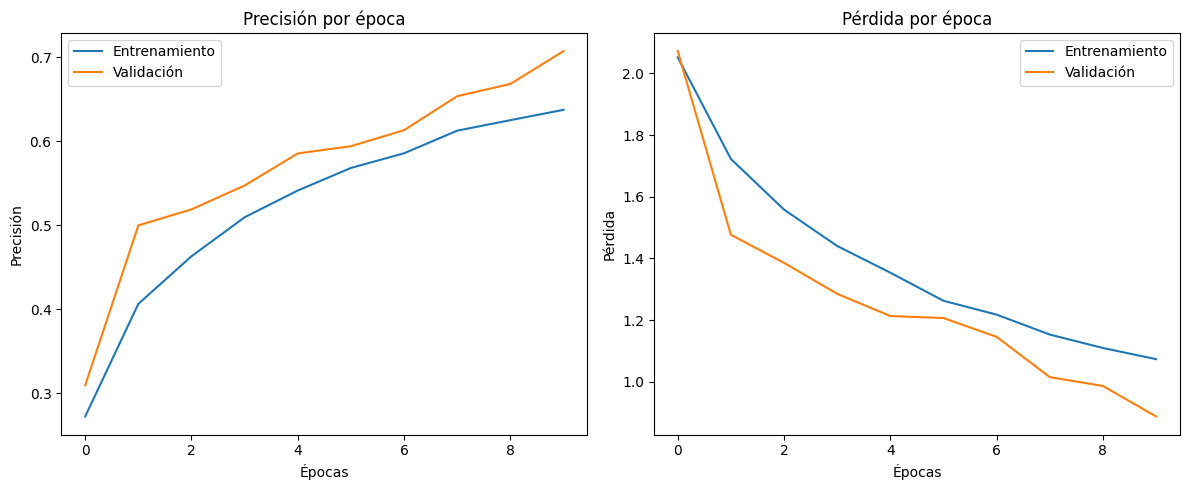

In [52]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()


plt.tight_layout()
plt.show()

